# Problem: Home Credit Default Risk

description: (if any)

summary: (if any)

Table of Content:
 - a
 - b

# Import Library

In [141]:
import os
import re
from typing import Dict, List, Union, Tuple
from functools import reduce

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# project root path
dir_project_root = os.path.dirname(os.getcwd())

# project sub directory
dir_raw_data = os.path.join(dir_project_root, 'data')

# path to data
path_application_train = os.path.join(dir_raw_data, 'application_train.csv')
path_application_test = os.path.join(dir_raw_data, 'application_test.csv')

path_bereau = os.path.join(dir_raw_data, 'bureau.csv')
path_bereau_balance = os.path.join(dir_raw_data, 'bureau_balance.csv')

path_previous_application = os.path.join(dir_raw_data, 'previous_application.csv')
path_pos_cash_balance = os.path.join(dir_raw_data, 'POS_CASH_balance.csv')
path_installment_payments = os.path.join(dir_raw_data, 'installments_payments.csv')
path_credit_card_balance = os.path.join(dir_raw_data, 'credit_card_balance.csv')

# Import Data

In [35]:
# application train-test data
df_application_train = pd.read_csv(path_application_train)
df_application_test = pd.read_csv(path_application_test)

# bereau data
df_bereau = pd.read_csv(path_bereau)
df_bereau_balance = pd.read_csv(path_bereau_balance)

# previous application data
df_previous_application = pd.read_csv(path_previous_application)
df_pos_cash_balance = pd.read_csv(path_pos_cash_balance)
df_installment_payments = pd.read_csv(path_installment_payments)
df_credit_card_balance = pd.read_csv(path_credit_card_balance)

# PART I - Exploratory Data Analysis

In [4]:
col_name_target = 'TARGET'
col_name_id = 'SK_ID_CURR'

list_col_pat_external = [r'EXT_SOURCE_(1|2|3)', r'APARTMENTS_(AVG|MODE|MEDI)', r'BASEMENTAREA_(AVG|MODE|MEDI)', r'YEARS_BEGINEXPLUATATION_', 
                         r'YEARS_BUILD_(AVG|MODE|MEDI)', r'COMMONAREA_(AVG|MODE|MEDI)', r'ELEVATORS_(AVG|MODE|MEDI)', r'ENTRANCES_(AVG|MODE|MEDI)', 
                         r'FLOORSMAX_(AVG|MODE|MEDI)', r'FLOORSMIN_(AVG|MODE|MEDI)', r'LANDAREA_(AVG|MODE|MEDI)', r'LIVINGAPARTMENTS_(AVG|MODE|MEDI)',
                         r'LIVINGAREA_(AVG|MODE|MEDI)', r'NONLIVINGAPARTMENTS_(AVG|MODE|MEDI)', r'NONLIVINGAREA_(AVG|MODE|MEDI)', 'TOTALAREA_MODE']

list_col_name_not_include = [col_name_target, col_name_id]
list_col_name_obj = df_application_train.select_dtypes(include='object').drop(columns=list_col_name_not_include, errors='ignore').columns.tolist()
list_col_name_nominal_from_description = [
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
    'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 
    'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
]

list_col_name_nominal = [*list_col_name_obj, *list_col_name_nominal_from_description]
list_col_name_numeric = [col for col in df_application_train.columns if col not in [*list_col_name_not_include, *list_col_name_nominal]]

In [10]:
def explore_nominal_column(df, col_name, list_col_name_nominal=list_col_name_nominal):
    if col_name not in list_col_name_nominal:
        raise ValueError('Invalid nominal column name')
    
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    
    n_nan = df[col_name].isnull().sum()
    n_unique_values = df[col_name].nunique()
    list_unique_values = df[col_name].unique().tolist()
    arr_value_counts = df[col_name].value_counts()

    print('Column name: {}'.format(col_name))
    print('Number of NaN values: {}'.format(n_nan))
    print('Number of n unique class: {}'.format(n_unique_values))
    print('List of unique values: {}'.format(list_unique_values))
    print('Unique values count:')
    arr_value_counts.plot(kind='barh', ax=ax)
    ax.invert_yaxis()
    plt.show()
    fig.clf()

def explore_numeric_column(df, col_name, list_col_name_numeric):
    if col_name not in list_col_name_numeric:
        raise ValueError('Invalid numeric column name')
    
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))

    n_nan = df[col_name].isnull().sum()
    statistic_col = df[col_name].describe()

    mean_value = statistic_col.loc['mean']
    std_value = statistic_col.loc['std']
    min_value = statistic_col.loc['min']
    q1_value = statistic_col.loc['25%']
    q2_value = statistic_col.loc['50%']
    q3_value = statistic_col.loc['75%']
    max_value = statistic_col.loc['max']

    print('Column name: {}'.format(col_name))
    print('Number of NaN values: {}'.format(n_nan))
    print('Statistics:')
    print('  - Mean: {}'.format(mean_value))
    print('  - Standard Deviasion: {}'.format(std_value))
    print('  - Minimum: {}'.format(min_value))
    print('  - Q1: {}'.format(q1_value))
    print('  - Median: {}'.format(q2_value))
    print('  - Q3: {}'.format(q3_value))
    print('  - Max: {}'.format(max_value))
    print('Distribution:')
    df[col_name].hist(bins=30, ax=axs[0])
    df.boxplot(column=col_name, ax=axs[1])
    plt.show()
    fig.clf()

def explore_initial_data(df):
    n_row, n_col = df.shape
    arr_count_nan = df.isnull().sum()
    n_col_nan = len(arr_count_nan[arr_count_nan > 0])
    list_col_types = df.dtypes.unique()

    print("Number of rows: {}".format(n_row))
    print("Number of columns: {}".format(n_col))
    print("Number of NaN columns: {}".format(n_col_nan))
    print("Col dtypes: {}".format(list_col_types))

def check_data_completeness_id(df_ref, df_check, col_name_ref, col_name_id):
    df_check_filter = df_check.loc[:, [col_name_id, col_name_ref]]
    df_ref_filter = df_ref.loc[:, [col_name_id]]

    df_check_nondup = df_check_filter.drop_duplicates(subset=col_name_id)
    df_for_count = df_ref_filter.merge(df_check_nondup, left_on=col_name_id, right_on=col_name_id, how='left')
    
    n_missins_records = df_for_count[col_name_ref].isna().sum()
    
    print("Number of missing records when join: {}".format(n_missins_records))

### Data exploration in Application data

#### <u>Initial inspection on dataset</u>

In [31]:
df_application_train.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
explore_initial_data(df_application_train)

Number of rows: 307511
Number of columns: 122
Number of NaN columns: 67
Col dtypes: [dtype('int64') dtype('O') dtype('float64')]


In [87]:
n_unique_id = len(df_application_train[col_name_id].unique())
n_row = df_application_train.shape[0]

print("Number of rows in dataset: {}".format(n_row))
print("Number of unique id in the dataset: {}".format(n_unique_id))

Number of rows in dataset: 307511
Number of unique id in the dataset: 307511


#### <u>Target column exploration</u>

##### <b>Insight 1:</b>

We have imbalanced data (proportion for each class in target variable is not the same)

In [25]:
df_application_train[col_name_target].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

#### <u>Nominal column exploration</u>

##### <b>Insight 1:</b>

Some nominal columns contain categories that only have few amount of records

<u>Appoach</u>: setting threshold as a percentage of total number of records to remove those low-frequency categories

<em>Those columns are including: <code>['CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']</code></em>

Column name: NAME_TYPE_SUITE
Number of NaN values: 1292
Number of n unique class: 7
List of unique values: ['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_A', nan, 'Other_B', 'Group of people']
Unique values count:


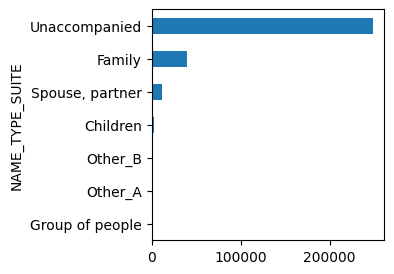

In [22]:
explore_nominal_column(df_application_train, col_name='NAME_TYPE_SUITE', list_col_name_nominal=list_col_name_nominal)

##### <b>Insight 2:</b>

Some nominal columns contain categories that could be grouped into theri main category

<u>Appoach</u>: grouping some categories into the same group considering definitions and low-frequency threshold

<em>Those columns are including: <code>['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']</code></em>

Column name: OCCUPATION_TYPE
Number of NaN values: 96391
Number of n unique class: 18
List of unique values: ['Laborers', 'Core staff', 'Accountants', 'Managers', nan, 'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff', 'Private service staff', 'Medicine staff', 'Security staff', 'High skill tech staff', 'Waiters/barmen staff', 'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff', 'HR staff']
Unique values count:


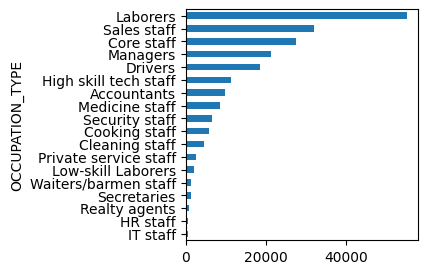

In [23]:
explore_nominal_column(df_application_train, col_name='OCCUPATION_TYPE', list_col_name_nominal=list_col_name_nominal)

##### <b>Insight 3:</b>

Some nominal columns only mainly contains 1 category (with/without NaN)

<u>Appoach</u>: remove these columns

<em>Those columns are including: <code>['HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'FONDKAPREMONT_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 
    'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']</code></em>

Column name: HOUSETYPE_MODE
Number of NaN values: 154297
Number of n unique class: 3
List of unique values: ['block of flats', nan, 'terraced house', 'specific housing']
Unique values count:


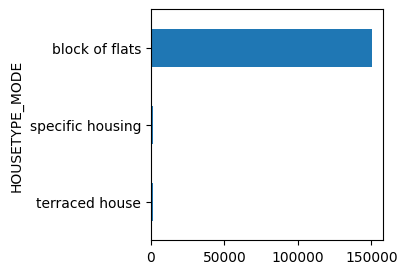

In [24]:
explore_nominal_column(df_application_train, col_name='HOUSETYPE_MODE', list_col_name_nominal=list_col_name_nominal)

#### <u>Numeric column exploration</u>

##### <b>Insight 1:</b>

Most of numeric columns which are contain lots of NaN values are <b>"External"</b> columns

<u>Appoach</u>: 
 - find the way to fill NaN on these columns, e.g., fit model with external data itself to avoid imputing bias
 - <b>fit the model that could handle NaN</b>

<em>Note:
 - These data are already normalized in [0, 1] scale
 - These column are highly correlated with those columns aggregated from either same or similar data source</em>

In [82]:
null_threshold = 0.4

arr_count_nan = df_application_train.loc[:, list_col_name_numeric].isnull().sum()
list_col_name_numeric_nan = arr_count_nan[arr_count_nan > df_application_train.shape[0] * null_threshold].index.to_list()

n_col_numeric_nan = len(list_col_name_numeric_nan)
n_col_numeric_ext = sum(map(lambda y: any(map(lambda x: bool(re.match(x, y)), list_col_pat_external)), list_col_name_numeric))
n_col_numeric_ext_nan = sum(map(lambda y: any(map(lambda x: bool(re.match(x, y)), list_col_pat_external)), list_col_name_numeric_nan))

print("[NaN threshold = {}%]".format(round(null_threshold * 100, 2)))
print("Number of numeric column contains NaN: {}".format(n_col_numeric_nan))
print("Number of \"External\" numeric column contains NaN: {} (from total {})".format(n_col_numeric_ext_nan, n_col_numeric_ext))

[NaN threshold = 40.0%]
Number of numeric column contains NaN: 45
Number of "External" numeric column contains NaN: 44 (from total 46)


##### <b>Insight 2:</b>

Some numeric columns are not truely continuous

<u>Appoach</u>: group values into bucket if using <b>non tree-based</b> model

 <em>Those columns are including: <code>['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']</code></em>

Column name: CNT_CHILDREN
Number of NaN values: 0
Statistics:
  - Mean: 0.4170517477423572
  - Standard Deviasion: 0.7221213844376252
  - Minimum: 0.0
  - Q1: 0.0
  - Median: 0.0
  - Q3: 1.0
  - Max: 19.0
Distribution:


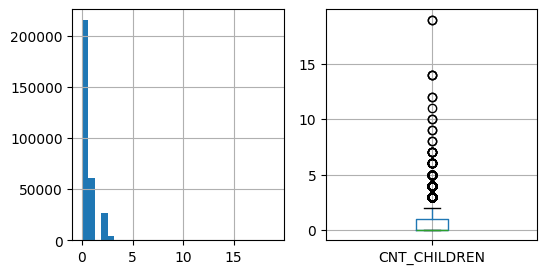

In [83]:
explore_numeric_column(df_application_train, col_name='CNT_CHILDREN', list_col_name_numeric=list_col_name_numeric)

##### <b>Insight 3:</b>

Some numeric columns contains outlier

<u>Appoach</u>:
 - remove outlier in column <code>'AMT_INCOME_TOTAL'</code>
 - use IQR range to cap outliers in other columns

 <em>Those columns are including: <code>['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'YEARS_BEGINEXPLUATATION_AVG', 'ENTRANCES_AVG', 'YEARS_BUILD_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE']</code></em>

Column name: AMT_INCOME_TOTAL
Number of NaN values: 0
Statistics:
  - Mean: 168797.9192969845
  - Standard Deviasion: 237123.14627885626
  - Minimum: 25650.0
  - Q1: 112500.0
  - Median: 147150.0
  - Q3: 202500.0
  - Max: 117000000.0
Distribution:


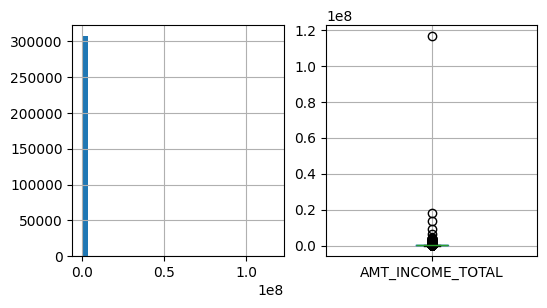

In [105]:
explore_numeric_column(df_application_train, col_name='AMT_INCOME_TOTAL', list_col_name_numeric=list_col_name_numeric)

##### <b>Insight 4:</b>

Some weird values in <code>DAY_EMPLOYED</code> columns

<u>Appoach</u>: Minimum clip on <code>DAY_EMPLOYED</code> column (with 0 values)

Column name: DAYS_EMPLOYED
Number of NaN values: 0
Statistics:
  - Mean: 63815.04590404896
  - Standard Deviasion: 141275.76651872724
  - Minimum: -17912.0
  - Q1: -2760.0
  - Median: -1213.0
  - Q3: -289.0
  - Max: 365243.0
Distribution:


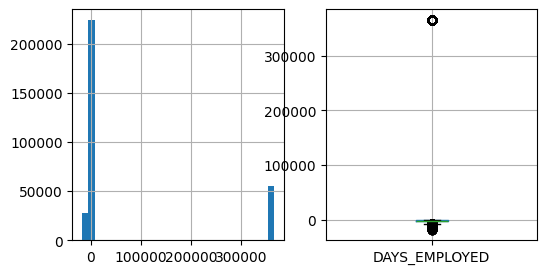

In [109]:
explore_numeric_column(df_application_train, col_name='DAYS_EMPLOYED', list_col_name_numeric=list_col_name_numeric)

##### <b>Insight 5:</b>

Variant scale of data

<u>Appoach</u>: Normalize numerical variables to [0, 1] scale

##### <b>Insight 6:</b>

External numeric columns are highly correlated with those aggregated from either same or similar data source

<u>Appoach</u>: Don't forget to remove redundant variables

##### <b>Insight 7:</b>

Some numeric columns are actually ordinal data

<u>Appoach</u>: drop these columns since most data are fall into one category

 <em>Those columns are including: <code>['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK']</code></em>

Column name: AMT_REQ_CREDIT_BUREAU_WEEK
Number of NaN values: 41519
Number of n unique class: 9
List of unique values: [0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, 7.0]
Unique values count:


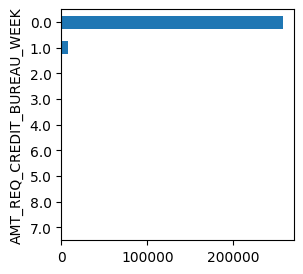

In [118]:
explore_nominal_column(df_application_train, col_name='AMT_REQ_CREDIT_BUREAU_WEEK', list_col_name_nominal=['AMT_REQ_CREDIT_BUREAU_WEEK'])

### Data exploration in Bereau data

#### <u>Initial inspection on dataset</u>

In [82]:
df_bereau.head(3)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


In [117]:
df_bereau.loc[df_bereau[col_name_id] == 162297]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.0,0.0,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.0,0.0,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.0,0.0,0.0,Credit card,-690,NaN
10,162297,5714472,Active,currency 1,-1146,0,-180.0,NaN,0.0,0,337500.00,0.0,0.0,0.0,Credit card,-690,NaN
11,162297,5714473,Closed,currency 1,-2456,0,-629.0,-825.0,NaN,0,675000.00,0.0,0.0,0.0,Consumer credit,-706,NaN
12,162297,5714474,Active,currency 1,-277,0,5261.0,NaN,0.0,0,7033500.00,NaN,NaN,0.0,Mortgage,-31,NaN


In [81]:
explore_initial_data(df_bereau)

Number of rows: 1716428
Number of columns: 17
Number of NaN columns: 7
Col dtypes: [dtype('int64') dtype('O') dtype('float64')]


In [14]:
df_bereau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [94]:
check_data_completeness_id(df_application_train, df_bereau, col_name_ref='SK_ID_BUREAU', col_name_id=col_name_id)

Number of missing records when join: 44020


#### <u>Nominal column exploration</u>

##### <b>Insight 1:</b>

Some nominal columns contain categories that only have few amount of records

<u>Appoach</u>:
 - Filter out ('Sold', 'Bad debt') category in <code>'CREDIT_ACTIVE'</code> column
 - Filter out ('currency 2', 'currency 4', 'currency 3') category in <code>'CREDIT_CURRENCY'</code> column
 - Cross-reference credit bureau status with Bureau Balance data

Column name: CREDIT_ACTIVE
Number of NaN values: 0
Number of n unique class: 4
List of unique values: ['Closed', 'Active', 'Sold', 'Bad debt']
Unique values count:


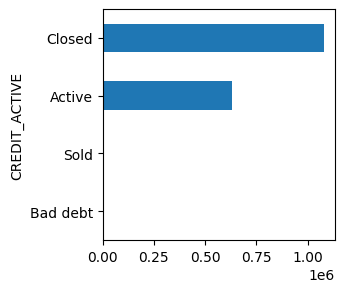

Column name: CREDIT_CURRENCY
Number of NaN values: 0
Number of n unique class: 4
List of unique values: ['currency 1', 'currency 2', 'currency 4', 'currency 3']
Unique values count:


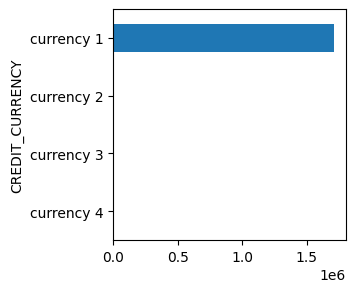

Column name: CREDIT_TYPE
Number of NaN values: 0
Number of n unique class: 15
List of unique values: ['Consumer credit', 'Credit card', 'Mortgage', 'Car loan', 'Microloan', 'Loan for working capital replenishment', 'Loan for business development', 'Real estate loan', 'Unknown type of loan', 'Another type of loan', 'Cash loan (non-earmarked)', 'Loan for the purchase of equipment', 'Mobile operator loan', 'Interbank credit', 'Loan for purchase of shares (margin lending)']
Unique values count:


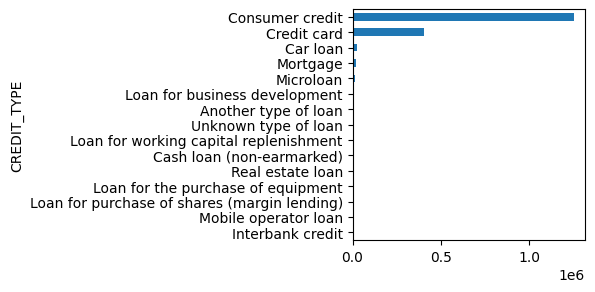

In [101]:
for col in ('CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'):
    explore_nominal_column(df_bereau, col_name=col, list_col_name_nominal=[col])

#### <u>Numeric column exploration</u>

##### <b>Insight 1:</b>

Some records in credit bereau dataset are out-of-date or have a weird value in <code>'DAYS_CREDIT_UPDATE'</code>

<u>Appoach</u>:
 - Filter out value > 0 in <code>'DAYS_CREDIT_UPDATE'</code> column
 - Filter out out-to-date records in <code>'DAYS_CREDIT_UPDATE'</code> column

Column name: DAYS_CREDIT_UPDATE
Number of NaN values: 0
Statistics:
  - Mean: -593.7483197663986
  - Standard Deviasion: 720.7473115011627
  - Minimum: -41947.0
  - Q1: -908.0
  - Median: -395.0
  - Q3: -33.0
  - Max: 372.0
Distribution:


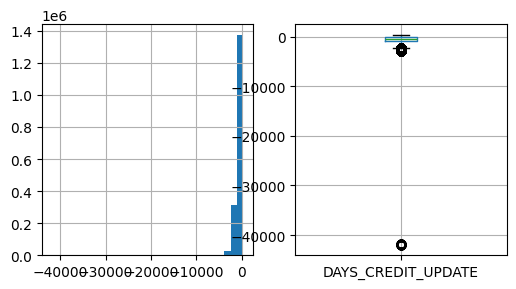

In [124]:
explore_numeric_column(df_bereau, col_name='DAYS_CREDIT_UPDATE', list_col_name_numeric=['DAYS_CREDIT_UPDATE'])

##### <b>Insight 2:</b>

There are some outliers in column <code>'CREDIT_DAY_OVERDUE'</code> that appears to be expired credit bureau

<u>Appoach</u>: clean those expired credit bureau

Column name: CREDIT_DAY_OVERDUE
Number of NaN values: 0
Statistics:
  - Mean: 0.8181665645165425
  - Standard Deviasion: 36.54442800616701
  - Minimum: 0.0
  - Q1: 0.0
  - Median: 0.0
  - Q3: 0.0
  - Max: 2792.0
Distribution:


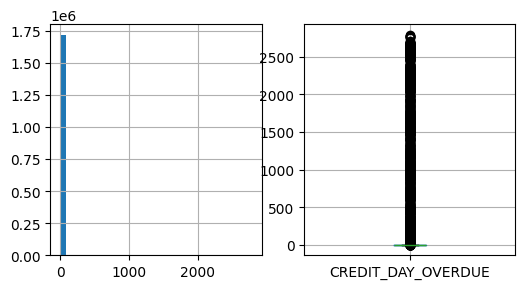

In [126]:
explore_numeric_column(df_bereau, col_name='CREDIT_DAY_OVERDUE', list_col_name_numeric=['CREDIT_DAY_OVERDUE'])

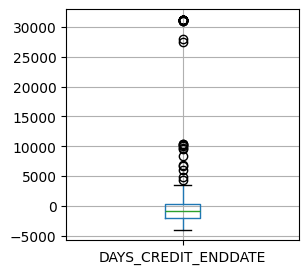

In [143]:
n_days_overdue = 90

fig, ax = plt.subplots(figsize=(3, 3))
df_bereau.loc[df_bereau.CREDIT_DAY_OVERDUE > n_days_overdue].boxplot(column='DAYS_CREDIT_ENDDATE', ax=ax)
plt.show()
fig.clf()

##### <b>Insight 3:</b>

There are some outliers in column <code>'DAYS_CREDIT_ENDDATE'</code>

<u>Appoach</u>:
 - Remove rows which are 'Active' status but have <code>'DAYS_CREDIT_ENDDATE'</code> < 0
 - Remove rows which are 'Closed' status but have <code>'DAYS_CREDIT_ENDDATE'</code> > 0
 - Don't use those positive outlier values from 'Credit card' loan type

Column name: DAYS_CREDIT_ENDDATE
Number of NaN values: 105553
Statistics:
  - Mean: 510.51736230309615
  - Standard Deviasion: 4994.219837125882
  - Minimum: -42060.0
  - Q1: -1138.0
  - Median: -330.0
  - Q3: 474.0
  - Max: 31199.0
Distribution:


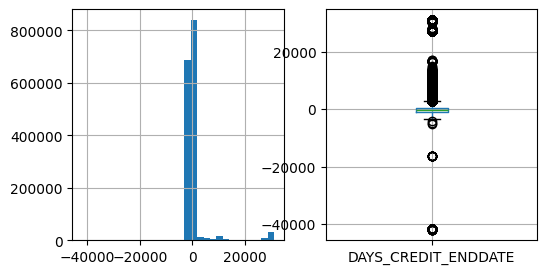

In [144]:
explore_numeric_column(df_bereau, col_name='DAYS_CREDIT_ENDDATE', list_col_name_numeric=['DAYS_CREDIT_ENDDATE'])

In [147]:
df_bereau.loc[df_bereau['CREDIT_ACTIVE'] == 'Active', 'DAYS_CREDIT_ENDDATE'].describe()

count    558111.000000
mean       2547.215375
std        7006.454056
min      -42056.000000
25%         173.000000
50%         678.000000
75%        1289.000000
max       31199.000000
Name: DAYS_CREDIT_ENDDATE, dtype: float64

In [148]:
df_bereau.loc[df_bereau['CREDIT_ACTIVE'] == 'Closed', 'DAYS_CREDIT_ENDDATE'].describe()

count    1.046843e+06
mean    -5.709404e+02
std      2.963936e+03
min     -4.206000e+04
25%     -1.485000e+03
50%     -8.060000e+02
75%     -2.760000e+02
max      3.119800e+04
Name: DAYS_CREDIT_ENDDATE, dtype: float64

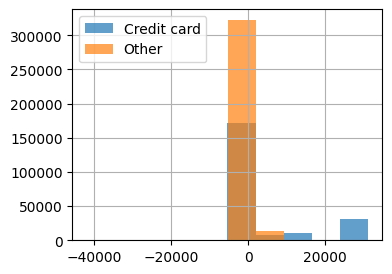

In [153]:
fig, ax = plt.subplots(figsize=(4, 3))
df_bereau['col_groupby'] = np.where(df_bereau.CREDIT_TYPE.eq('Credit card'), 'Credit card', 'Other')
df_bereau.loc[df_bereau.CREDIT_ACTIVE == 'Active'].groupby('col_groupby')['DAYS_CREDIT_ENDDATE'].hist(alpha=0.7, ax=ax, legend=True)
plt.show()
fig.clf()

del df_bereau['col_groupby']

##### <b>Insight 4:</b>

There are some outliers in column <code>['DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE']</code>

<u>Appoach</u>: remove outliers in column

Column name: DAYS_ENDDATE_FACT
Number of NaN values: 633653
Statistics:
  - Mean: -1017.43714806862
  - Standard Deviasion: 714.0106263423945
  - Minimum: -42023.0
  - Q1: -1489.0
  - Median: -897.0
  - Q3: -425.0
  - Max: 0.0
Distribution:


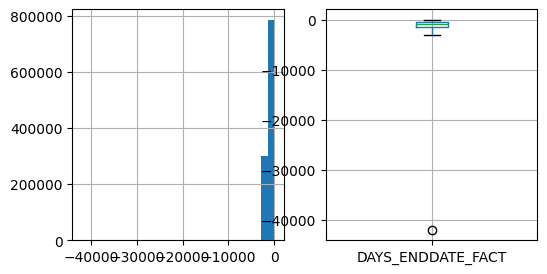

In [154]:
explore_numeric_column(df_bereau, col_name='DAYS_ENDDATE_FACT', list_col_name_numeric=['DAYS_ENDDATE_FACT'])

#### <u>Feature engineering on Credit Bereau</u>
- Has credit bureau record?
- Count number of active loans
- Latest application on previous loan
- Count number of loan past due (keep both sources)
- Is previous loan past due ('Closed' status)
- Is active loan past due ('Active' status)
- Maximum of <code>DAYS_CREDIT_ENDDATE</code> for non 'Credit card' loans
- Minimum of <code>DAYS_ENDDATE_FACT</code> for 'Closed' loans
- Sum amount of <code>AMT_CREDIT_SUM_DEBT</code>

### Data exploration in Bureau Balance data

##### <u>Initial inspection on dataset</u>

In [158]:
df_bereau_balance.head(3)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


In [159]:
explore_initial_data(df_bereau_balance)

Number of rows: 27299925
Number of columns: 3
Number of NaN columns: 0
Col dtypes: [dtype('int64') dtype('O')]


##### <u>Data inconsistencies on previous Bereau dataset</u>

##### <b>Insight 1:</b>

There are some inconsistensies on credit bureau status between Bureau dataset and Bureau Balance dataset

<u>Appoach</u>:
- cross-reference latest status on Bureau data (C / A)
- determine overdue status directly from Bereau Balance dataset

In [ ]:
df_bereau.loc[df_bereau.SK_ID_BUREAU == 5715448]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
768,380361,5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0


In [163]:
df_bereau_balance.loc[df_bereau_balance.SK_ID_BUREAU == 5715448].head(4)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C


Column name: STATUS
Number of NaN values: 0
Number of n unique class: 8
List of unique values: ['C', '0', 'X', '1', '2', '3', '5', '4']
Unique values count:


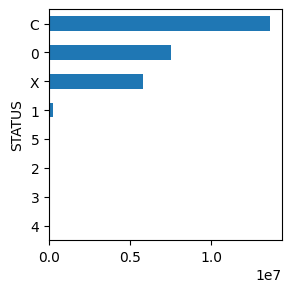

In [160]:
explore_nominal_column(df_bereau_balance, col_name='STATUS', list_col_name_nominal=['STATUS'])

### Data exploration in Previous Application data

In [ ]:
list_col_name_ids = ['SK_ID_PREV', 'SK_ID_CURR']
list_col_name_str = df_previous_application.select_dtypes(include='object').columns.tolist() + ['NFLAG_LAST_APPL_IN_DAY', 'NFLAG_INSURED_ON_APPROVAL']
list_col_name_numeric = [col for col in df_previous_application.columns if col not in [*list_col_name_ids, *list_col_name_str]]

#### <u>Initial inspection on dataset</u>

In [150]:
df_previous_application.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


In [172]:
df_previous_application.loc[df_previous_application[col_name_id] == 162297]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
229247,2513435,162297,Consumer loans,9069.840,82332.9,75645.0,13500.9,82332.9,THURSDAY,10,...,Consumer electronics,12.0,high,POS household with interest,365243.0,-2136.0,-1806.0,-1806.0,-1800.0,0.0
1092526,1155486,162297,Consumer loans,5257.215,33957.0,26194.5,9000.0,33957.0,TUESDAY,16,...,Connectivity,6.0,low_normal,POS mobile with interest,365243.0,-2831.0,-2681.0,-2681.0,-2633.0,1.0


In [153]:
explore_initial_data(df_previous_application)

Number of rows: 1670214
Number of columns: 37
Number of NaN columns: 16
Col dtypes: [dtype('int64') dtype('O') dtype('float64')]


In [157]:
df_previous_application.isnull().sum()[df_previous_application.isnull().sum() > 0]

AMT_ANNUITY                   372235
AMT_CREDIT                         1
AMT_DOWN_PAYMENT              895844
AMT_GOODS_PRICE               385515
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64

Drop column : <code>['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE']</code>

In [179]:
row_cnt = df_previous_application.groupby(list_col_name_ids).size()
row_cnt[row_cnt > 1]

Series([], dtype: int64)

In [156]:
check_data_completeness_id(df_application_train, df_previous_application, col_name_ref='SK_ID_PREV', col_name_id=col_name_id)

Number of missing records when join: 16454


#### <u>Nominal column exploration</u>

##### <b>Insight 1:</b>

Some nominal columns contain categories that only have few amount of records

<u>Appoach</u>:
 - Only keep ('Consumer loans', 'Cash loans', 'Revolving loans') category in column <code>'NAME_CONTRACT_TYPE'</code>
 - Drop column <code>['NAME_PAYMENT_TYPE']</code>

Column name: NAME_CONTRACT_TYPE
Number of NaN values: 0
Number of n unique class: 4
List of unique values: ['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA']
Unique values count:


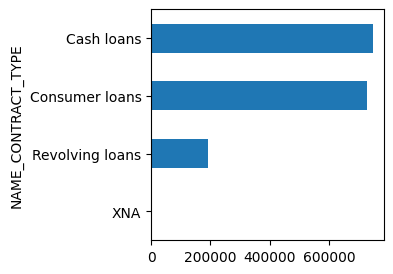

In [173]:
explore_nominal_column(df_previous_application, col_name='NAME_CONTRACT_TYPE', list_col_name_nominal=list_col_name_str)

##### <b>Insight 2:</b>

Some nominal columns are not related to the problem

<u>Appoach</u>: drop those columns

<em>Those columns are including: <code>['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE', 'NAME_TYPE_SUITE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']</code></em>

##### <b>Insight 3:</b>

According to data dict, there could be multiple applications for one single contact

<u>Appoach</u>: Flag 'Y' on column <code>'FLAG_LAST_APPL_PER_CONTRACT'</code>

In [183]:
df_previous_application['FLAG_LAST_APPL_PER_CONTRACT'].value_counts()

FLAG_LAST_APPL_PER_CONTRACT
Y    1661739
N       8475
Name: count, dtype: int64

#### <u>Numeric column exploration</u>

##### <b>Insight 1:</b>

Some "DAYS_*" columns contains weird values

<u>Appoach</u>: replace those weird values (value > 0) as NaN

<em>Those columns are including: <code>['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', DAYS_LAST_DUE', 'DAYS_TERMINATION']</code></em>

Column name: DAYS_LAST_DUE
Number of NaN values: 673065
Statistics:
  - Mean: 76582.40306413585
  - Standard Deviasion: 149647.4151231759
  - Minimum: -2889.0
  - Q1: -1314.0
  - Median: -537.0
  - Q3: -74.0
  - Max: 365243.0
Distribution:


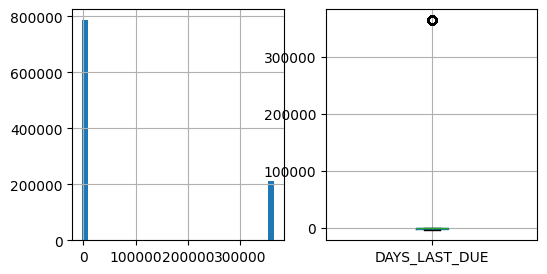

In [186]:
explore_numeric_column(df_previous_application, col_name='DAYS_LAST_DUE', list_col_name_numeric=['DAYS_LAST_DUE'])

In [ ]:
df_previous_application.loc[df_previous_application['DAYS_LAST_DUE'] > 0, 'DAYS_LAST_DUE'].value_counts()

DAYS_LAST_DUE
365243.0    211221
Name: count, dtype: int64

##### <b>Insight 2:</b>

Some numerical columns are not related to the problem

<u>Appoach</u>: drop those columns

<em>Those columns are including: <code>['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_TERMINATION']</code></em>

#### <u>Feature engineering on Previous Application</u>
- Is there any previous application or not
- Is all loans are approved
- Is there any loan rejected within the specified period
- Is there any loan cancelled within the specified period
- Last loan approval time if any (column <code>'DAYS_DECISION'</code>)
- Latest loan application / Last loan approval
- Latest client type (column <code>'NAME_CLIENT_TYPE'</code>)
- Maximum loan amount that was previously approved (column <code>'AMT_CREDIT'</code>)
- Current application amount / MAX(<code>'AMT_CREDIT'</code>)
- Minimun of days last due (column <code>'DAYS_LAST_DUE'</code>)
- Did client requested insurance during the latest application or not (column <code>'NFLAG_INSURED_ON_APPROVAL'</code>)

# PART II - Data Preprocessing

In [273]:
def filter_high_freq_category(df_app: pd.DataFrame, list_col_nominal: List[str], threshold: Union[int, float] = 0.03) -> Dict[str, List[str]]:
    dict_nominal_category = dict()
    
    if type(threshold) == float:
        n_min_records = round(df_app.shape[0] * threshold, 0)
    else:
        n_min_records = threshold

    for col in list_col_nominal:
        value_counts = df_app[col].value_counts(dropna=True)
        filter_high_freq = value_counts.gt(n_min_records)
        list_category_high_freq = value_counts[filter_high_freq].index.tolist()
        dict_nominal_category[col] = list_category_high_freq

    return dict_nominal_category

def handle_outliers(df: pd.DataFrame, col_name: str, drop_outlier: bool = False) -> pd.DataFrame:
    df = df.copy()
    arr_col_stats = df[col_name].describe()

    q1 = arr_col_stats.loc['25%']
    q3 = arr_col_stats.loc['75%']
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    if drop_outlier:
        filter_non_outlier = df[col_name].between(lower, upper)
        df = df.loc[filter_non_outlier, :]
    else:
        df.loc[df[col_name] < lower, col_name] = lower
        df.loc[df[col_name] > upper, col_name] = upper
    
    return df

def update_remove_cols(list_col: List[str], list_remove_col: List[str]) -> List[str]:
    for col in list_remove_col:
        if col in list_col:
            list_col.remove(col)

def preprocess_application_data(df_app: pd.DataFrame, list_col_name_numeric: List[str], list_col_name_nominal: List[str]):
    list_col_to_drop = [
        'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'FONDKAPREMONT_MODE', 'EMERGENCYSTATE_MODE', 
        'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_7', 
        'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
        'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK'
    ]
    list_col_contain_outlier = [
        'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'YEARS_BEGINEXPLUATATION_AVG', 
        'ENTRANCES_AVG', 'YEARS_BUILD_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE'
    ]
    
    df = df_app.copy()

    df.drop(columns=list_col_to_drop, inplace=True)
    update_remove_cols(list_col=list_col_name_numeric, list_remove_col=list_col_to_drop)
    update_remove_cols(list_col=list_col_name_nominal, list_remove_col=list_col_to_drop)

    dict_category = filter_high_freq_category(df, list_col_nominal=list_col_name_nominal, threshold=.02)
    
    # convert dtypes
    for col in list_col_name_nominal:
        categories_ = dict_category[col]
        if len(categories_) == 1:
            df.drop(columns=[col], inplace=True)
            update_remove_cols(list_col=list_col_name_nominal, list_remove_col=[col, ])
        else:
            order_ = col in ('REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY')
            df[col] = pd.Categorical(df[col], categories=categories_, ordered=order_)
    
    # remove outlier
    for col in list_col_contain_outlier:
        bool_remove_outliers_ = col == 'AMT_INCOME_TOTAL'
        handle_outliers(df, col_name=col, drop_outlier=bool_remove_outliers_)

    # remove weird values in DAYS_EMPLOYED col
    df['DAYS_EMPLOYED'] = np.minimum(0, df['DAYS_EMPLOYED'])

    return df

def remove_correlate_features():
    pass

def fit_scaler(df, list_col_name_numeric):
    pass

def fit_dummy():
    pass

def fit_sklearn_pipeline():
    pass

def preprocess_df_bureau_ref(df_bal: pd.DataFrame) -> pd.DataFrame:
    # feature engineering: is_dpd
    list_status_dpd = ('1', '2', '3', '4', '5')
    df_bal['is_month_dpd'] = df_bal['STATUS'].isin(list_status_dpd)

    # aggregation : latest info
    idx_latest = df_bal.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].idxmax()
    df_latest_info = df_bal.loc[idx_latest, ['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS']]
    df_latest_info['status_ref'] = np.where(df_latest_info['STATUS'].eq('C'), 'Closed',
                                            np.where(df_latest_info['STATUS'].eq('X'), 'Unknown', 'Active'))
    df_latest_info.drop(columns='STATUS', inplace=True)
    
    # aggregation: historical dpd for each bureau
    df_historical_dpd = df_bal.groupby('SK_ID_BUREAU')['is_month_dpd'].sum().reset_index()
    df_bureau_crossref = df_latest_info.merge(df_historical_dpd, left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU', how='inner')
    df_bureau_crossref = df_bureau_crossref.rename(columns={'is_month_dpd': 'count_month_dpd', 'MONTHS_BALANCE': 'month_latest_update'})

    return df_bureau_crossref

def preprocess_df_bereau(df_id_ref: pd.DataFrame, df_bereau: pd.DataFrame, df_bereau_ref: pd.DataFrame) -> pd.DataFrame:
    n_years = 6
    n_days_minimum = -365 * n_years
    
    # scope relevant information (by ID)
    df_bereau = df_id_ref.merge(df_bereau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

    filter_currency = df_bereau['CREDIT_CURRENCY'].eq('currency 1')
    filter_incorrect_update_date = df_bereau['DAYS_CREDIT_UPDATE'] <= 0
    filter_new_update_info = df_bereau['DAYS_CREDIT_UPDATE'] > n_days_minimum

    df_bereau = df_bereau.loc[filter_currency & filter_incorrect_update_date & filter_new_update_info, :]

    # cross-reference
    df_bereau = df_bereau.merge(df_bereau_ref, left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU', how='left')
    df_bereau['credit_status'] = np.where(df_bereau['status_ref'].notna(), df_bereau['status_ref'], df_bereau['CREDIT_ACTIVE'])

    # filter out incorrect DAYS_CREDIT_ENDDATE
    filter_out_incorrect_active_enddate = (df_bereau['credit_status'] == 'Active') & (df_bereau['DAYS_CREDIT_ENDDATE'] < 0)
    filter_out_incorrect_closed_enddate = (df_bereau['credit_status'] == 'Closed') & (df_bereau['DAYS_CREDIT_ENDDATE'] >= 0)
    filter_other_status = df_bereau['credit_status'].isin(('Active', 'Closed'))
    df_bereau = df_bereau.loc[filter_out_incorrect_active_enddate | filter_out_incorrect_closed_enddate | filter_other_status, :]

    return df_bereau

def merge_bereau_feature(df_id_ref: pd.DataFrame, df_bereau_prep: pd.DataFrame) -> pd.DataFrame:
    list_bereau_col_select = ['SK_ID_CURR', 'SK_ID_BUREAU', 'credit_status', 'DAYS_CREDIT_UPDATE', 
                              'CREDIT_DAY_OVERDUE', 'count_month_dpd', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_SUM_DEBT']
    df_bereau_selected = df_bereau_prep.loc[:, list_bereau_col_select]
    df_bereau_history = df_id_ref.merge(df_bereau_selected, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left')

    # column generate
    df_bereau_history['is_bereau_history'] = df_bereau_history['SK_ID_BUREAU'].notna()
    df_bereau_history['is_past_due'] = df_bereau_history[['CREDIT_DAY_OVERDUE', 'count_month_dpd']].max(axis=1).gt(0)

    filter_loan_active = df_bereau_history['credit_status'].eq('Active')
    filter_loan_closed = df_bereau_history['credit_status'].eq('Closed')

    # feature engineering
    arr_feature_is_bereau_history = df_bereau_history.groupby('SK_ID_CURR')['is_bereau_history'].any()
    df_feature_is_bereau_history = arr_feature_is_bereau_history.reset_index()

    arr_feature_num_active_loan = df_bereau_history.loc[filter_loan_active].groupby('SK_ID_CURR').size()
    df_feature_n_active_loan = arr_feature_num_active_loan.rename('cnt_active_loan').reset_index()

    arr_feature_latest_application_day = df_bereau_history.groupby('SK_ID_CURR')['DAYS_CREDIT_UPDATE'].min()
    df_feature_latest_application_day = arr_feature_latest_application_day.rename('last_days_update').reset_index()

    arr_feature_cnt_active_loan_past_due = df_bereau_history.loc[filter_loan_active].groupby('SK_ID_CURR')['is_past_due'].sum()
    df_feature_cnt_active_loan_past_due = arr_feature_cnt_active_loan_past_due.rename('cnt_active_loan_past_due').reset_index()

    arr_feature_cnt_closed_loan_past_due = df_bereau_history.loc[filter_loan_closed].groupby('SK_ID_CURR')['is_past_due'].sum()
    df_feature_cnt_closed_loan_past_due = arr_feature_cnt_closed_loan_past_due.rename('cnt_closed_loan_past_due').reset_index()

    arr_feature_total_credit_day_overdue = df_bereau_history.groupby('SK_ID_CURR')['CREDIT_DAY_OVERDUE'].sum()
    df_feature_total_credit_day_overdue = arr_feature_total_credit_day_overdue.rename('total_credit_day_overdue').reset_index()

    arr_feature_max_remaining_bereau_date = df_bereau_history.groupby('SK_ID_CURR')['DAYS_CREDIT_ENDDATE'].max()
    df_feature_max_remaining_bereau_date = arr_feature_max_remaining_bereau_date.rename('max_days_credit_enddate').reset_index()
    
    arr_feature_min_enddate_closed_loan = df_bereau_history.loc[filter_loan_closed].groupby('SK_ID_CURR')['DAYS_ENDDATE_FACT'].min()
    df_feature_min_enddate_closed_loan = arr_feature_min_enddate_closed_loan.rename('min_days_enddate_fact').reset_index()

    arr_feature_total_credit_debt = df_bereau_history.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum()
    df_feature_total_credit_debt = arr_feature_total_credit_debt.rename('total_amt_credit_sum_debt').reset_index()

    # merge all features together
    list_dfs = [df_id_ref, df_feature_is_bereau_history, df_feature_n_active_loan, df_feature_latest_application_day, df_feature_cnt_active_loan_past_due,
                df_feature_cnt_closed_loan_past_due, df_feature_total_credit_day_overdue, df_feature_max_remaining_bereau_date, df_feature_min_enddate_closed_loan,
                df_feature_total_credit_debt]
    df_features = reduce(lambda left, right: pd.merge(left, right, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left'), list_dfs)

    df_features['cnt_active_loan'] = df_features['cnt_active_loan'].fillna(0)
    df_features['cnt_active_loan_past_due'] = df_features['cnt_active_loan_past_due'].fillna(0)
    df_features['cnt_closed_loan_past_due'] = df_features['cnt_closed_loan_past_due'].fillna(0)
    
    return df_features

def preprocess_df_prev_application_data(df_prev_app: pd.DataFrame) -> pd.DataFrame:
    # filter df scope
    list_category_contract_type = ('Consumer loans', 'Cash loans', 'Revolving loans')
    filter_name_contract_type = df_prev_app['NAME_CONTRACT_TYPE'].isin(list_category_contract_type)
    filter_flag_last_appl = df_prev_app['FLAG_LAST_APPL_PER_CONTRACT'].eq('Y')

    df_prev_app = df_prev_app.loc[filter_name_contract_type & filter_flag_last_appl]

    # fixing date error
    for col in ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']:
        filter_weird_days = df_prev_app[col].gt(0)
        df_prev_app.loc[filter_weird_days, col] = np.nan

    return df_prev_app

def merge_prev_app_features(df_id_ref: pd.DataFrame, df_prev_app_prep: pd.DataFrame) -> pd.DataFrame:
    df_prev_app_history = df_id_ref.merge(df_prev_app_prep, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left')

    df_1 = df_prev_app_history.groupby('SK_ID_CURR')['SK_ID_PREV'].max().notna().reset_index().rename(columns={'SK_ID_PREV': 'is_prev_app_history'})
    
    filter_status_approved = df_prev_app_history['NAME_CONTRACT_STATUS'].eq('Approved')
    filter_status_refused = df_prev_app_history['NAME_CONTRACT_STATUS'].eq('Refused')
    filter_status_canceled = df_prev_app_history['NAME_CONTRACT_STATUS'].eq('Canceled')

    df_n_prev_app = df_prev_app_history.groupby('SK_ID_CURR').size().rename('cnt_prev_appl').reset_index()
    df_n_appr_prev_app = df_prev_app_history.loc[filter_status_approved].groupby('SK_ID_CURR').size().rename('cnt_appr_prev_appl').reset_index()
    df_2 = df_n_prev_app.merge(df_n_appr_prev_app, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left')
    df_2['cnt_appr_prev_appl'] = df_2['cnt_appr_prev_appl'].fillna(0)
    df_2['is_all_loan_approved'] = df_2['cnt_prev_appl'].eq(df_2['cnt_appr_prev_appl'])
    df_2.drop(columns=['cnt_appr_prev_appl', 'cnt_prev_appl'], inplace=True)

    day_cutoff = df_prev_app_history['DAYS_DECISION'].describe().loc['75%']
    filter_day_cutoff = df_prev_app_history['DAYS_DECISION'].gt(day_cutoff)
    
    df_id_refuse = df_prev_app_history.loc[filter_status_refused & filter_day_cutoff, ['SK_ID_CURR', 'SK_ID_PREV']].drop_duplicates(subset='SK_ID_CURR')
    df_3 = df_id_ref.merge(df_id_refuse, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left')
    df_3['is_loan_refused_within_curr_period'] = df_3['SK_ID_PREV'].notna()
    df_3.drop(columns='SK_ID_PREV', inplace=True)

    df_id_canceled = df_prev_app_history.loc[filter_status_canceled & filter_day_cutoff, ['SK_ID_CURR', 'SK_ID_PREV']].drop_duplicates(subset='SK_ID_CURR')
    df_4 = df_id_ref.merge(df_id_canceled, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left')
    df_4['is_loan_canceled_within_curr_period'] = df_4['SK_ID_PREV'].notna()
    df_4.drop(columns='SK_ID_PREV', inplace=True)

    df_latest_info = df_prev_app_history.groupby('SK_ID_CURR')['DAYS_DECISION'].max().reset_index().rename(columns={'DAYS_DECISION': 'latest_information_day'})
    df_latest_loan_approval = df_prev_app_history.loc[filter_status_approved].groupby('SK_ID_CURR')['DAYS_DECISION'].max().reset_index().rename(columns={'DAYS_DECISION': 'latest_loan_approval'})
    df_5 = df_latest_info.merge(df_latest_loan_approval, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left')
    df_5['ratio_last_appl_to_last_appr'] = df_5['latest_information_day'] / df_5['latest_loan_approval']
    df_5.drop(columns='latest_information_day', inplace=True)

    df_6 = df_prev_app_history.groupby('SK_ID_CURR')['AMT_CREDIT'].max().reset_index().rename(columns={'AMT_CREDIT': 'max_amt_credit'})

    df_7 = df_prev_app_history.groupby('SK_ID_CURR')['DAYS_LAST_DUE'].min().reset_index().rename(columns={'DAYS_LAST_DUE': 'min_days_last_due'})

    df_8 = df_prev_app_history.groupby('SK_ID_CURR')['NFLAG_INSURED_ON_APPROVAL'].any().reset_index().rename(columns={'NFLAG_INSURED_ON_APPROVAL': 'is_req_ins_on_appr'})
    
    list_dfs = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8]
    df_features = reduce(lambda left, right: pd.merge(left, right, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner'), list_dfs)
    
    return df_features

In [24]:
df_application_train = preprocess_application_data(df_application_train, list_col_name_numeric, list_col_name_nominal)

In [25]:
df_bureau_bal_ref = preprocess_df_bureau_ref(df_bereau_balance)

In [68]:
df_id_ref = df_application_train.loc[:, ['SK_ID_CURR']]
df_bereau = preprocess_df_bereau(df_id_ref, df_bereau, df_bureau_bal_ref)

In [149]:
df_bereau_features = merge_bereau_feature(df_id_ref, df_bereau)

In [193]:
df_previous_application_prep = preprocess_df_prev_application_data(df_previous_application)

In [276]:
df_prev_appl_features = merge_prev_app_features(df_id_ref, df_previous_application_prep)

## Playground (delete later)